In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing Data

df = pd.read_csv(r'/content/FastagFraudDetection.csv')
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [ ]:
df.shape

(5000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
# Data types of columns
print("\nData types:")
df.dtypes


Data types:


Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

In [ ]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
# Dropping null values from database

df.dropna(inplace=True)

In [ ]:
# Checking unique value counts of Vehicle_Type in the database

df['Vehicle_Type'].value_counts()

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of Lane_Type in the database

df['Lane_Type'].value_counts()

Lane_Type
Regular    2858
Express    2142
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of Vehicle_Dimensions in the database

df['Vehicle_Dimensions'].value_counts()

Vehicle_Dimensions
Large     2144
Small     1428
Medium    1428
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of TollBoothID in the database

df['TollBoothID'].value_counts()

TollBoothID
B-102    1432
A-101    1428
C-103    1426
D-106     570
D-105     104
D-104      40
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of Transaction_Amount in the database

df['Transaction_Amount'].value_counts()

Transaction_Amount
0      714
120    430
100    288
350    286
330    286
290    286
110    286
340    286
300    286
140    284
130    284
115    144
150    144
145    144
90     142
60     142
70     142
180    142
160    142
125    142
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of Fraud_indicator in the database

df['Fraud_indicator'].value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

In [ ]:
# Checking unique value counts of Vehicle_Speed in the database

df['Vehicle_Speed'].value_counts()

Vehicle_Speed
55     132
68     124
45     124
60     120
52     120
      ... 
29       2
28       2
27       2
26       2
102      2
Name: count, Length: 85, dtype: int64

In [ ]:
# Checking unique value counts of Geographical_Location in the database

df['Geographical_Location'].value_counts()

Geographical_Location
13.059816123454882, 77.77068662374292    1000
13.042660878688794, 77.47580097259879    1000
12.84197701525119, 77.67547528176169     1000
12.936687032945434, 77.53113977439017    1000
13.21331620748757, 77.55413526894684     1000
Name: count, dtype: int64

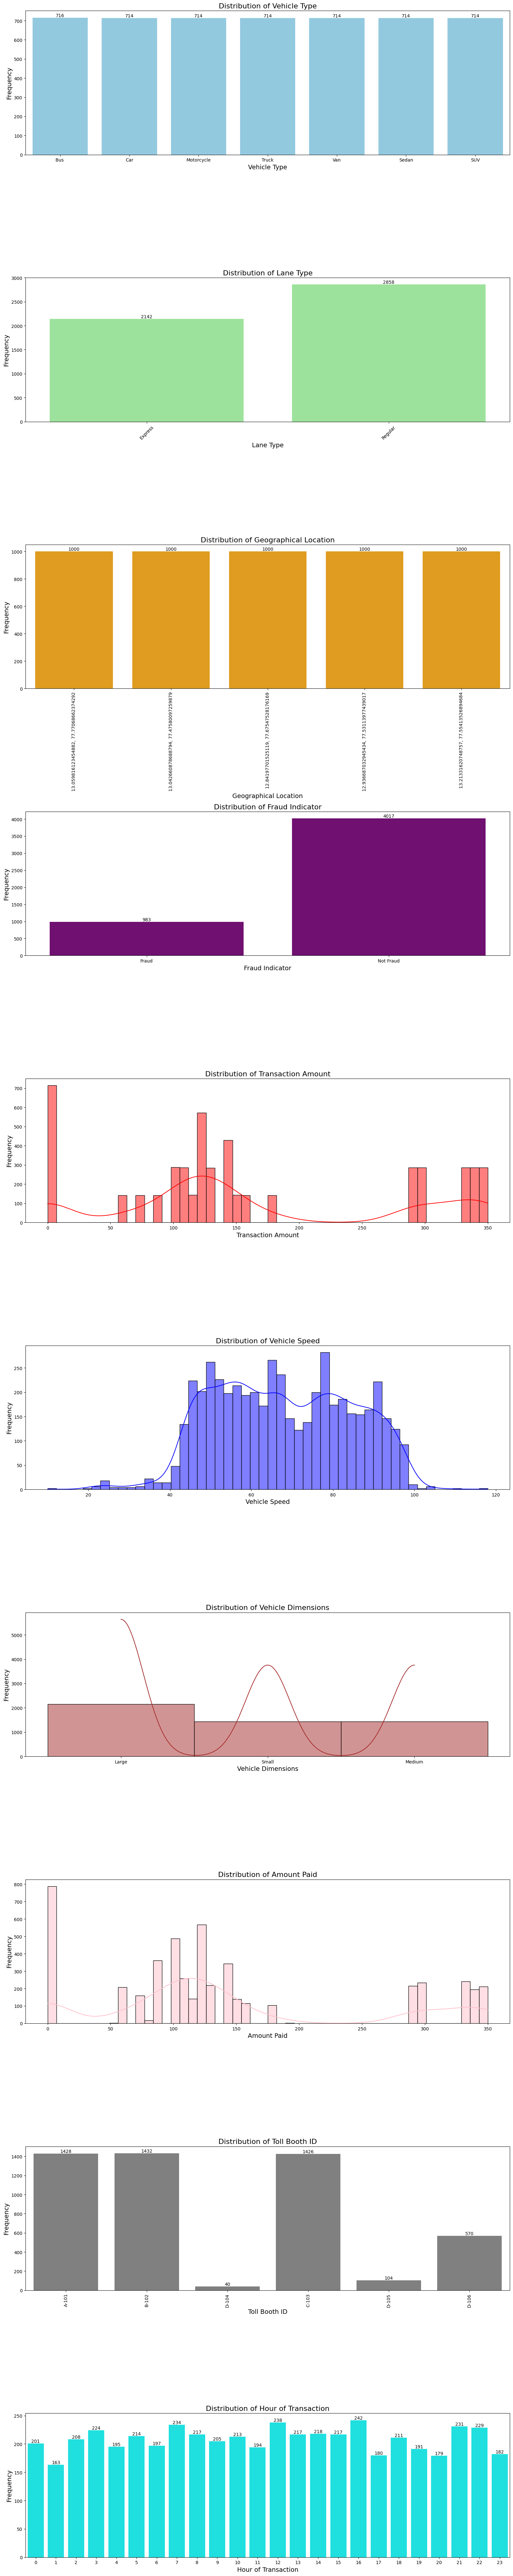

In [ ]:
# Convert Timestamp to datetime to extract the hour
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour

# Create a figure with multiple subgraphs to cover all attributes
fig, ax = plt.subplots(10, 1, figsize=(16, 80))
plt.subplots_adjust(hspace=0.5)  # Adjust the space between plots

# Define a list of colors for each plot
colors = ["skyblue", "lightgreen", "orange", "purple", "red", "blue", "brown", "pink", "grey", "cyan"]

# Plot 1: Distribution of vehicle types
vehicle_type_plot = sns.countplot(x='Vehicle_Type', data=df, ax=ax[0], color=colors[0])
ax[0].set_xlabel('Vehicle Type', fontsize=14)
ax[0].set_ylabel('Frequency', fontsize=14)
ax[0].set_title('Distribution of Vehicle Type', fontsize=16)
ax[0].grid(False)
for container in vehicle_type_plot.containers:
    vehicle_type_plot.bar_label(container)

# Plot 2: Distribution of lane types
lane_type_plot = sns.countplot(x='Lane_Type', data=df, ax=ax[1], color=colors[1])
ax[1].set_xlabel('Lane Type', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)
ax[1].set_title('Distribution of Lane Type', fontsize=16)
ax[1].grid(False)
ax[1].tick_params(axis='x', rotation=45)
for container in lane_type_plot.containers:
    lane_type_plot.bar_label(container)

# Plot 3: Distribution of geographical locations
geo_location_plot = sns.countplot(x='Geographical_Location', data=df, ax=ax[2], color=colors[2])
ax[2].set_xlabel('Geographical Location', fontsize=14)
ax[2].set_ylabel('Frequency', fontsize=14)
ax[2].set_title('Distribution of Geographical Location', fontsize=16)
ax[2].grid(False)
ax[2].tick_params(axis='x', rotation=90)
for container in geo_location_plot.containers:
    geo_location_plot.bar_label(container)

# Plot 4: Distribution of fraud indicators
fraud_indicator_plot = sns.countplot(x='Fraud_indicator', data=df, ax=ax[3], color=colors[3])
ax[3].set_xlabel('Fraud Indicator', fontsize=14)
ax[3].set_ylabel('Frequency', fontsize=14)
ax[3].set_title('Distribution of Fraud Indicator', fontsize=16)
ax[3].grid(False)
for container in fraud_indicator_plot.containers:
    fraud_indicator_plot.bar_label(container)

# Plot 5: Distribution of transaction amounts
transaction_amount_plot = sns.histplot(df['Transaction_Amount'], bins=50, kde=True, ax=ax[4], color=colors[4])
ax[4].set_xlabel('Transaction Amount', fontsize=14)
ax[4].set_ylabel('Frequency', fontsize=14)
ax[4].set_title('Distribution of Transaction Amount', fontsize=16)
ax[4].grid(False)

# Plot 6: Distribution of vehicle speeds
vehicle_speed_plot = sns.histplot(df['Vehicle_Speed'], bins=50, kde=True, ax=ax[5], color=colors[5])
ax[5].set_xlabel('Vehicle Speed', fontsize=14)
ax[5].set_ylabel('Frequency', fontsize=14)
ax[5].set_title('Distribution of Vehicle Speed', fontsize=16)
ax[5].grid(False)

# Plot 7: Distribution of vehicle dimensions
vehicle_dimensions_plot = sns.histplot(df['Vehicle_Dimensions'], bins=50, kde=True, ax=ax[6], color=colors[6])
ax[6].set_xlabel('Vehicle Dimensions', fontsize=14)
ax[6].set_ylabel('Frequency', fontsize=14)
ax[6].set_title('Distribution of Vehicle Dimensions', fontsize=16)
ax[6].grid(False)

# Plot 8: Distribution of amount paid
amount_paid_plot = sns.histplot(df['Amount_paid'], bins=50, kde=True, ax=ax[7], color=colors[7])
ax[7].set_xlabel('Amount Paid', fontsize=14)
ax[7].set_ylabel('Frequency', fontsize=14)
ax[7].set_title('Distribution of Amount Paid', fontsize=16)
ax[7].grid(False)

# Plot 9: Distribution of toll booth IDs
tollbooth_id_plot = sns.countplot(x='TollBoothID', data=df, ax=ax[8], color=colors[8])
ax[8].set_xlabel('Toll Booth ID', fontsize=14)
ax[8].set_ylabel('Frequency', fontsize=14)
ax[8].set_title('Distribution of Toll Booth ID', fontsize=16)
ax[8].grid(False)
ax[8].tick_params(axis='x', rotation=90)
for container in tollbooth_id_plot.containers:
    tollbooth_id_plot.bar_label(container)

# Plot 10: Distribution of hours of transactions
hour_plot = sns.countplot(x='Hour', data=df, ax=ax[9], color=colors[9])
ax[9].set_xlabel('Hour of Transaction', fontsize=14)
ax[9].set_ylabel('Frequency', fontsize=14)
ax[9].set_title('Distribution of Hour of Transaction', fontsize=16)
ax[9].grid(False)
for container in hour_plot.containers:
    hour_plot.bar_label(container)

# Adjust the spacings for a better presentation
plt.tight_layout()

# Show graphs
plt.show()


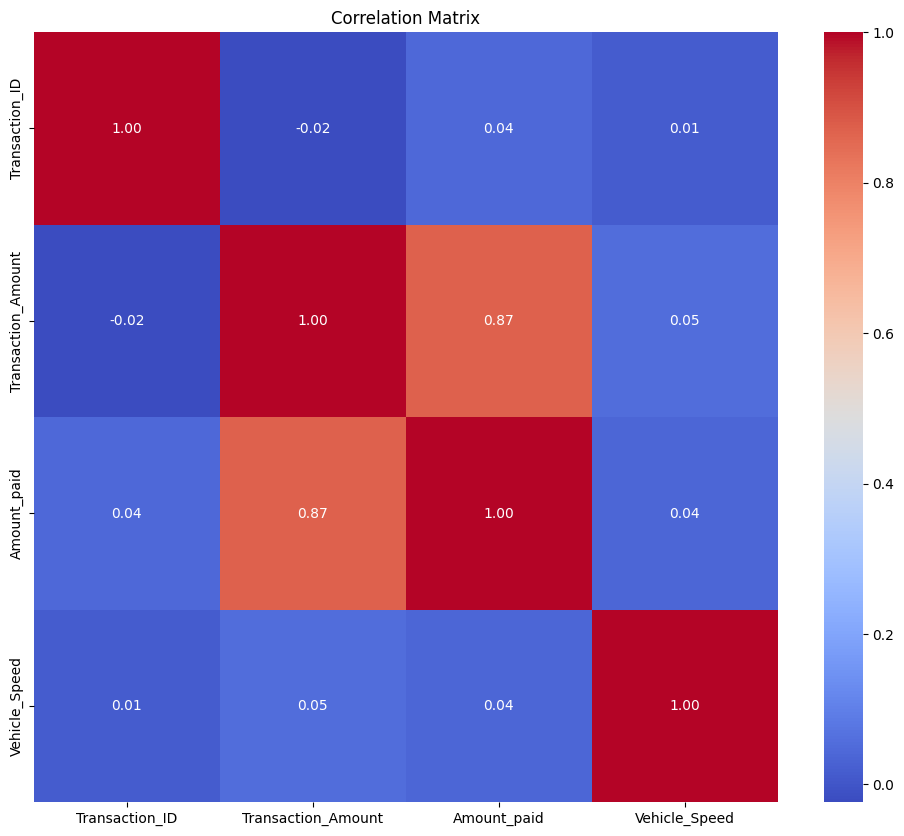

In [ ]:
# Ensure that only numerical columns are considered for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))  # Adjusting the figure size for better readability
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

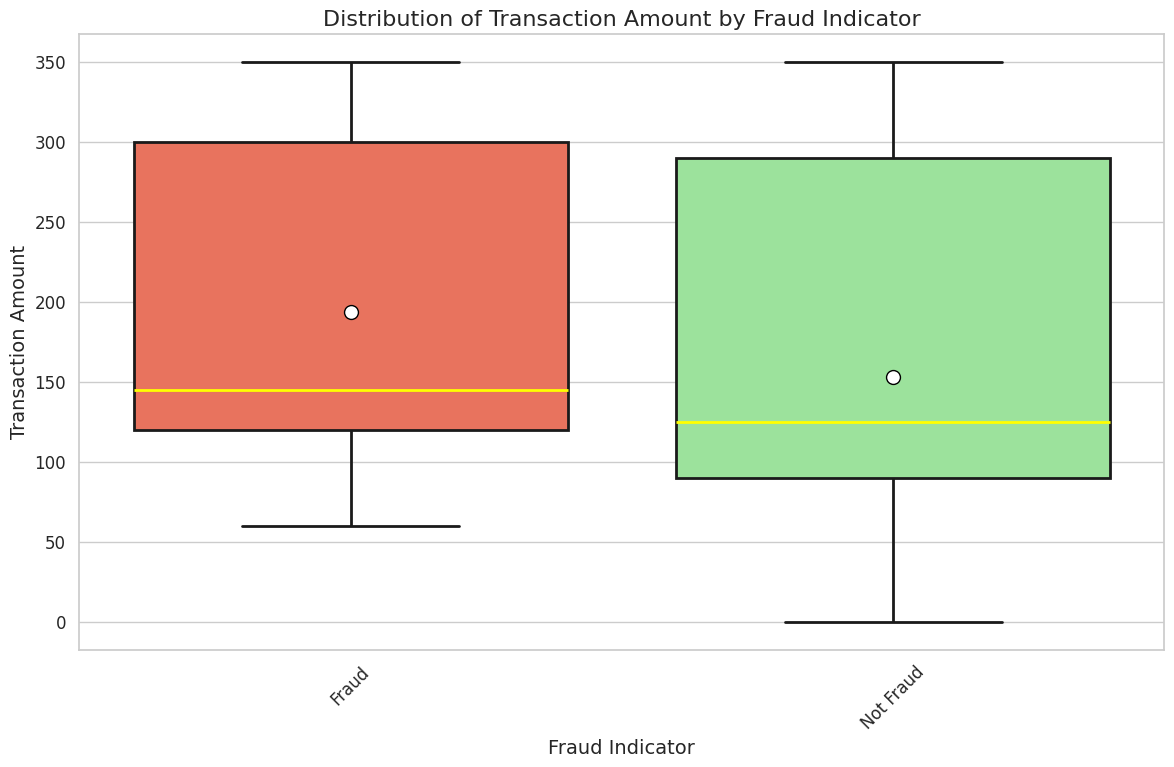

In [ ]:
# Create a boxplot to visualize the distribution of Transaction Amount by Fraud Indicator
plt.figure(figsize=(14, 8))  # Set the figure size for better readability
sns.set(style="whitegrid")  # Change the style of the plot to 'whitegrid' for a clean look

# Create the boxplot
box_plot = sns.boxplot(
    x="Fraud_indicator",
    y="Transaction_Amount",
    showmeans=True,
    data=df,
    palette=["#FF6347", "#90EE90"],
    boxprops=dict(edgecolor='k', linewidth=2),  # Customize the box edge color and width
    whiskerprops=dict(color='k', linewidth=2),  # Customize the whisker color and width
    capprops=dict(color='k', linewidth=2),      # Customize the cap color and width
    medianprops=dict(color='yellow', linewidth=2),  # Customize the median line color and width
    meanprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=10)  # Customize the mean point
)

# Customize the labels and title
plt.xlabel("Fraud Indicator", fontsize=14)  # X-axis label
plt.ylabel("Transaction Amount", fontsize=14)  # Y-axis label
plt.title("Distribution of Transaction Amount by Fraud Indicator", fontsize=16)  # Title of the plot
plt.xticks(rotation=45, fontsize=12)  # Rotate the x-axis labels for better readability
plt.yticks(fontsize=12)  # Customize the y-axis labels font size

# Show the plot
plt.show()

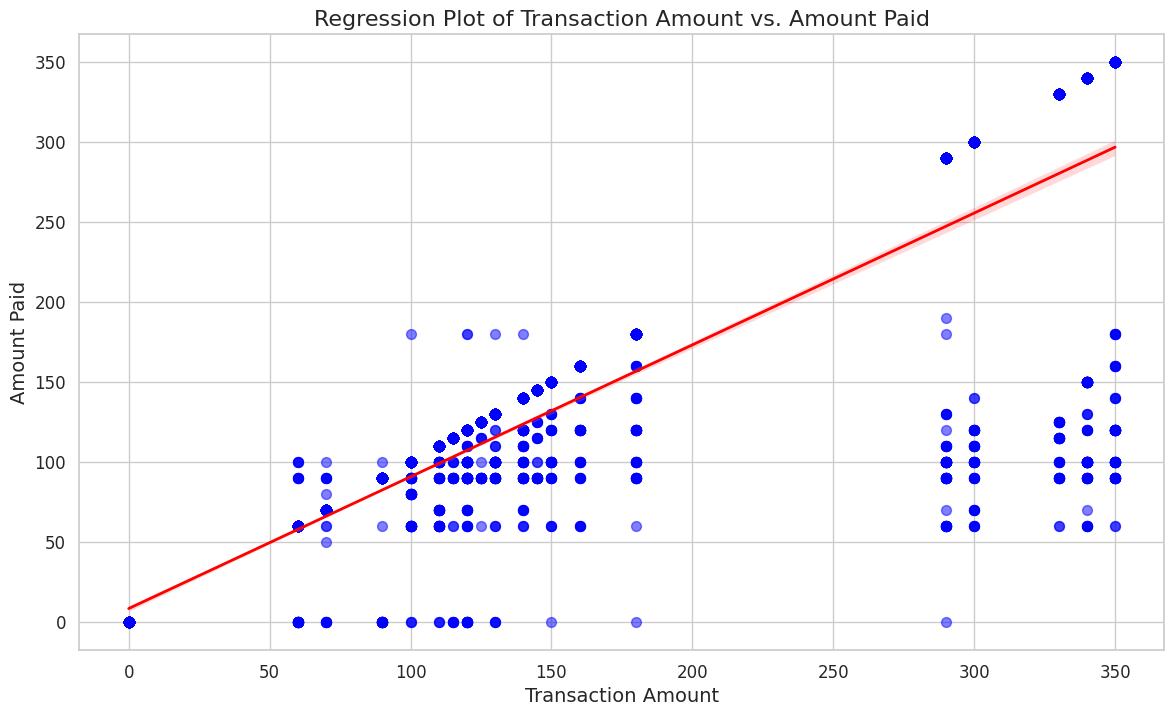

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Change the style of the plot to 'whitegrid' for a clean look
sns.set(style="whitegrid")

# Create a regression plot to visualize the relationship between Transaction Amount and Amount Paid
reg_plot = sns.regplot(
    x='Transaction_Amount',
    y='Amount_paid',
    data=df,
    scatter_kws={'s': 50, 'alpha': 0.5, 'color': 'blue'},  # Customize scatter points
    line_kws={'color': 'red', 'lw': 2}  # Customize regression line
)

# Customize the labels and title
plt.xlabel("Transaction Amount", fontsize=14)
plt.ylabel("Amount Paid", fontsize=14)
plt.title("Regression Plot of Transaction Amount vs. Amount Paid", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Verify the column names in your DataFrame
print(df.columns)

# Adjust the list of columns to drop accordingly
x = df.drop(['Fraud_indicator', 'Vehicle_Type', 'Lane_Type', 'Geographical_Location',
             'Transaction_Amount', 'Vehicle_Speed', 'Amount_paid', 'Hour'], axis=1)
y = df['Fraud_indicator']
print(x)
print(y)

Index(['Vehicle_Type', 'Lane_Type', 'Transaction_Amount', 'Amount_paid',
       'Geographical_Location', 'Vehicle_Speed', 'Fraud_indicator', 'Hour',
       'Day', 'Month', 'Year', 'Minute', 'Day_of_Week', 'State_Code',
       'Time_Diff'],
      dtype='object')
      Day  Month  Year  Minute Day_of_Week State_Code  Time_Diff
0       5      1  2023      20      Friday         KA        0.0
1       6      1  2023      55    Saturday         KA        0.0
2       7      1  2023      25      Sunday         KA        0.0
3       8      1  2023       5      Monday         KA        0.0
4       9      1  2023      35     Tuesday         KA        0.0
...   ...    ...   ...     ...         ...        ...        ...
4995    0      1  2023      18      Sunday         KA        0.0
4996   16      1  2023      43     Tuesday         KA        0.0
4997    4      2  2023       8      Sunday         KA        0.0
4998   19      2  2023      34      Monday         KA        0.0
4999    9      3  2023 

In [ ]:
# Verify the column names in your DataFrame
print(x.columns)

# Convert the 'Day' column (if it exists) to a numerical representation
# If the 'Day' column is not present, adjust the code accordingly
if 'Day' in x.columns:
    x = pd.get_dummies(x, columns=['Day'])

# Select only numerical columns after one-hot encoding (if performed)
x_numerical = x.select_dtypes(include=['float64', 'int64'])

# Now proceed with scaling
scaler = StandardScaler()
scaler.fit(x_numerical)
x_scaled = scaler.transform(x_numerical)

Index(['Month', 'Year', 'Minute', 'Day_of_Week', 'State_Code', 'Time_Diff',
       'Day_0', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7',
       'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14',
       'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21',
       'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28',
       'Day_29', 'Day_30'],
      dtype='object')


In [ ]:
x=x_scaled
y=df['Fraud_indicator']
print(x)
print(y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
0           Fraud
1           Fraud
2       Not Fraud
3           Fraud
4           Fraud
          ...    
4995    Not Fraud
4996    Not Fraud
4997    Not Fraud
4998    Not Fraud
4999        Fraud
Name: Fraud_indicator, Length: 5000, dtype: object


In [ ]:
#TRAINING THE MODEL
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_test.shape,x_train.shape)

(5000, 1) (4000, 1) (1000, 1)


In [68]:
#TRAINING THE MODEL
from sklearn import svm
classifer=svm.SVC(kernel='linear')
#TRAINING THE SVM CLASSIFIER
classifer.fit(x_train,y_train)

SVC(kernel='linear')

In [69]:
#MODEL EVALUATION

#ACCURACY SCORE ON THE TRAINING DATA
x_train_prediction=classifer.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

print("accuracy score of training data is : ",training_data_accuracy)

accuracy score of training data is :  0.803


In [70]:
#ACCURACY SCORE ON THE TEST DATA
x_test_prediction=classifer.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

print("accuracy score of test data is : ",test_data_accuracy)

accuracy score of test data is :  0.8035


In [81]:
#PREDICTIVE SYSTEM

#METHOD-1
input_data=[[140]]

prediction=classifer.predict(input_data)
print(prediction)

['Not Fraud']


In [80]:
#METHOD-2
input_data=(100)

#changing the input data into numpy array
input_data_asnumpy_arr=np.asarray(input_data)

#reshape the array as we are predicting for 1 instance
input_data_reshaped=input_data_asnumpy_arr.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)

prediction=classifer.predict(std_data)
print(prediction)

['Not Fraud']
